# Let's play with another method of simulating evolution. 
#### In our last workbook on drift, we were replacing the entire population every timestep. This method is generally known as a Wright-Fisher (remember them?) simulation. It is a popular method for computational models.

#### Another way of simulating a population is to, at every timestep, choose a random organism to die, and replace it by choosing a random individual to reproduce.

#### Note that in this method of simulating a population, you have to run through *Pop_Size* timesteps before, on average, the entire population is replaced (i.e., a generation). 

In [2]:
import random
from matplotlib import pyplot, animation
import numpy as np
from IPython.display import HTML

## For this example, lets make our organisms a bit more interesting. 
#### Each genotype is a x, y coordinate, and were seeding the population with individuals where x and y are in the rangre [0,1). This is the default behavior of the random.random() function.

## There may be two bits of new Python syntax here:

List Comprehensions -- (http://www.learnpython.org/en/List_Comprehensions)

Tuples -- (https://www.digitalocean.com/community/tutorials/understanding-tuples-in-python-3)

#### List comprehensions are shorthand ways of programatically building a list
#### Tuples are indexible collections, a lot like lists, but are *immutable*.

In [4]:
a = (1,2)
(2, a[1])

(2, 2)

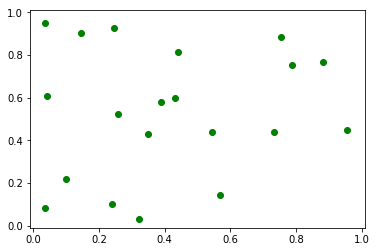

In [2]:
pop_size = 20
num_generations = 100

population = [(random.random(), random.random()) for _ in range(pop_size)]

for individual in population:
    pyplot.plot(individual[0], individual[1], "go")
    
pyplot.xlim(-0.01, 1.01)
pyplot.ylim(-0.01, 1.01)
pyplot.show()


### Here we will pick a random individual, and replace it with another random individual from the population.

In [3]:
#Pick a random individual in the population
random_index = random.randint(0, len(population)-1)

#Replicate that individual, overwriting a random location
second_random_index = random.randint(0, len(population)-1)
population[second_random_index] = population[random_index]


## To simulate a generation, we need to do this process *pop_size* times. So, if we're going to simulate multiple generations, we have to do *pop_size* x *num_generations* timesteps.

In [3]:
#do this "pop_size" times to simulate the an average generation
pop_size = 50
num_generations = 20

population = [(random.random(), random.random()) for _ in range(pop_size)]
populations = [population[:]]

for gen in range(num_generations):
    
    #One generation = pop_size reproductions
    for i in range(pop_size):
        #Pick a random individual in the population
        random_index = random.randint(0, len(population)-1)

        #Replicate that individual, overwriting a random location
        second_random_index = random.randint(0, len(population)-1)
        population[second_random_index] = population[random_index]
            
    #note the [:] in the append statement...
    #this tells python to copy the population
    #instead of just appending a reference
    populations.append(population[:])
    

## We could plot each population in a different graph to see how drift is driving the population to fix particular genotypes. 

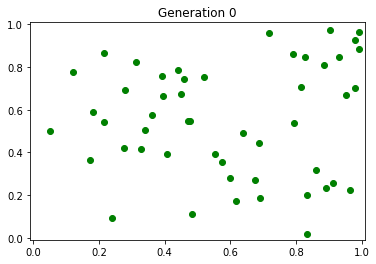

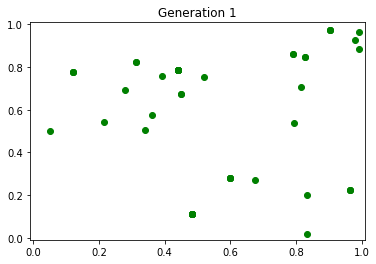

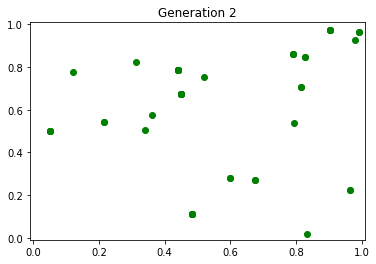

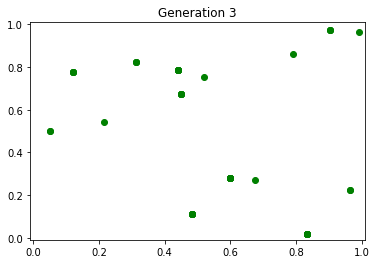

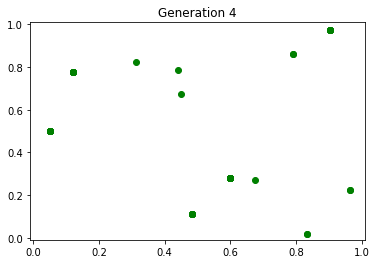

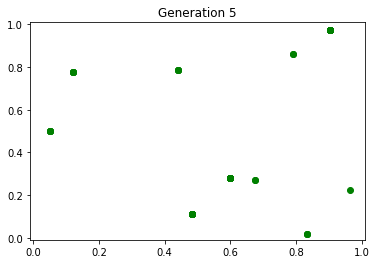

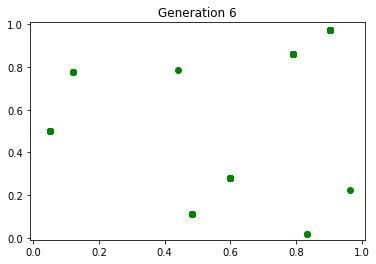

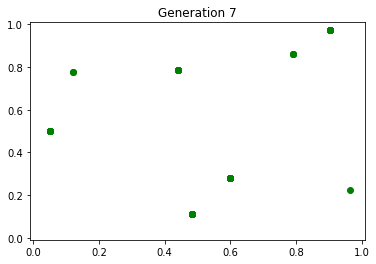

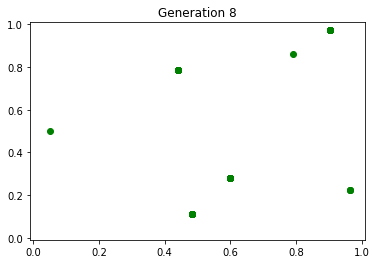

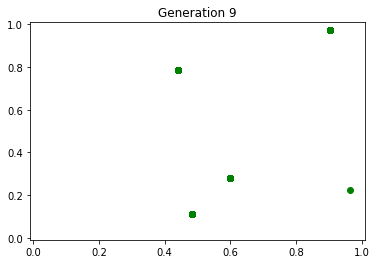

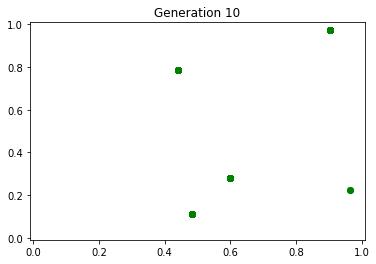

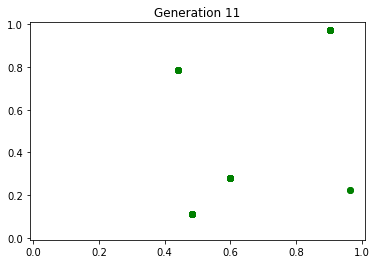

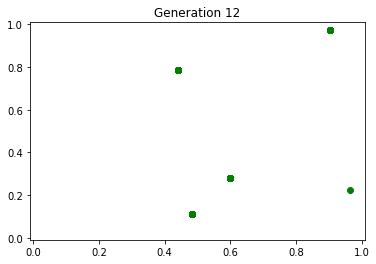

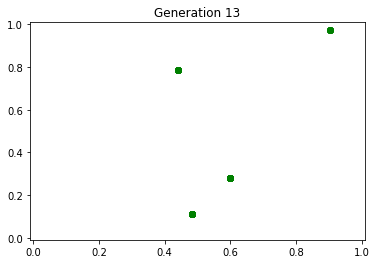

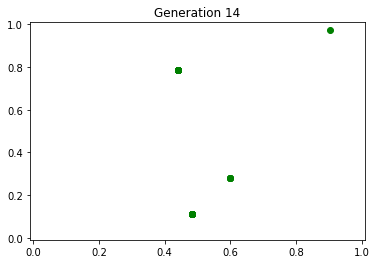

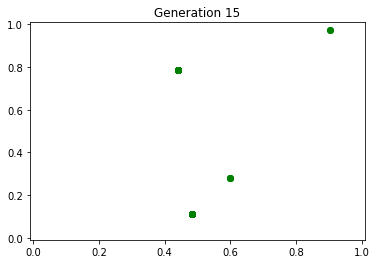

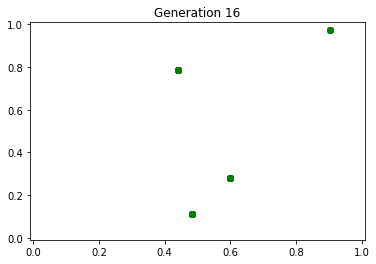

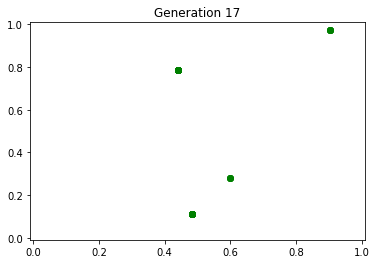

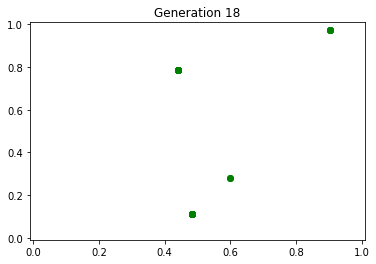

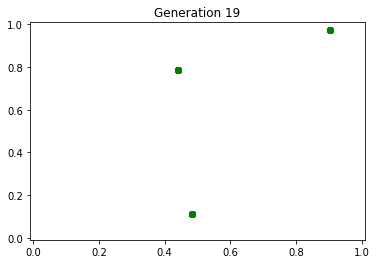

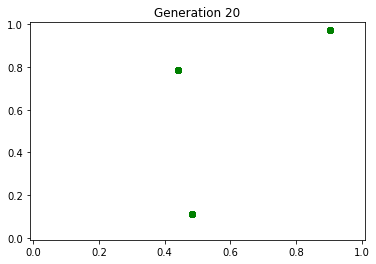

In [4]:
for pop_i in range(len(populations)):
    pyplot.figure()
    for individual in populations[pop_i]:
        pyplot.plot(individual[0], individual[1], "go")
    
    pyplot.title("Generation " + str(pop_i))
    pyplot.xlim(-0.01, 1.01)
    pyplot.ylim(-0.01, 1.01)
    pyplot.show()

## But it's way more fun to make a little video using some built-in functions that matplotlib and jupyter notebooks give us. 

#### The animate function takes an index, and modifies the data in the plot we initated (in our case, using this index to pull the right population out of the list we made earlier). 

In [6]:
#This code will loop through all the populations stored in the
#populations list and make them into a movie. 
fig, ax = pyplot.subplots()
ax.axis([-0.01,1.01,-0.01,1.01])
l, = ax.plot([],[], 'go')

def animate(i):
    population_xs = [ind[0] for ind in populations[i]]
    population_ys = [ind[1] for ind in populations[i]]
    l.set_data(population_xs, population_ys)
    
ani = animation.FuncAnimation(fig, animate, frames=len(populations))

from IPython.display import HTML
HTML(ani.to_jshtml())

## It's a little hard to see what's happening when all the points start overlapping though. 

## We could add a little "jitter" to the plot so that we can see multiple individuals when they have the same genotype (i.e., x,y coordinate).

#### To do this, we'll just add a tiny bit of gaussian (normal) noise around their x,y values
#### random.gauss(0, 0.01) draws from a normal distribution with mean=0 and sd=0.01

In [6]:
#This code will loop through all the populations stored in the
#populations list and make them into a movie. 
fig, ax = pyplot.subplots()
ax.axis([-0.01,1.01,-0.01,1.01])
l, = ax.plot([],[], 'go')

def animate(i):
    population_xs = [ind[0] + random.gauss(0, 0.01) for ind in populations[i]]
    population_ys = [ind[1] + random.gauss(0, 0.01) for ind in populations[i]]
    l.set_data(population_xs, population_ys)
    
ani = animation.FuncAnimation(fig, animate, frames=len(populations))

from IPython.display import HTML
HTML(ani.to_jshtml())

## This looks cooler than line graphs, but we're seeing the same exact effect as before. Genotypes randomly drift and eventually one will fix in the population.










# 1. What would be even better though is if each organism had a probability of mutating each time they reproduced. 

### a) Implement a mutation operation that occurs at some rate when individuals reproduce.
### b) Plot a video **without** jitter that shows the population mutating.
### c) Play with the rate and magnitude of mutation effects.

# 2. Can you think of an easy way of assigning organisms fitness? 
### a) Write a fitness function that assigns fitness based on the genotype's location.
### b) Plot a video showing how the population evolves with your implemented fitness function.
### c) Try making a more complex fitness functions (e.g., two-peaks, time-varying)!